In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#Variables 

sz = 10000000 #For the size of the normal distributions
solar_mass_to_kg = 1.989 * (10**30) 
days_to_seconds = 86400 #Conversion factor from days to seconds

mass_hat16 = 1.22 * solar_mass_to_kg
mass_hat16_err = 0.04 * solar_mass_to_kg

radial_velocity = 500 #m/s
radial_velocity_err = 100 #m/s

au_to_m = 1.496e+11

transit_time = 0.1126 * days_to_seconds

In [35]:
def kepler_third(G, M, P):
  return (G*M*P**2/(4*np.pi**2))**(1/3)

The mean of the semi-major (AU) axis is:  0.04130369368212013
The standard deviation of the semi-major axis (AU) is:  0.00045171826172018316


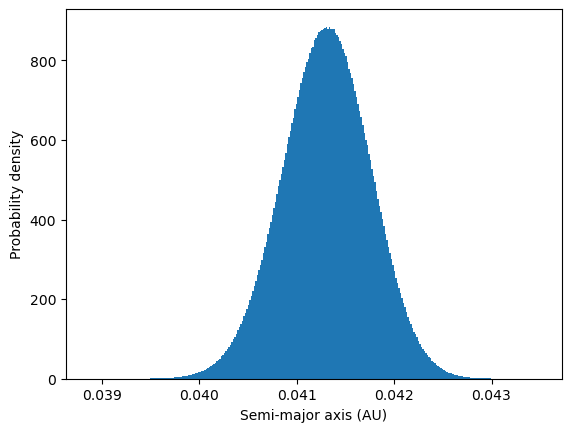

In [36]:
#1.a

#Mass hat16 = 1.22 ± 0/04 solar masses 
#Period hat16_b = 2.776 days 

#Kepler's third law: A^3 = (GM * P^2) / (4 * pi^2)

has16_mass_dist = np.random.normal(mass_hat16, mass_hat16_err, sz) #Normal distribution for the mass of hat16

period_hat16b = 2.776 #Days

hat16b_semi_major_axis = kepler_third(6.67408 * (10**-11), has16_mass_dist, period_hat16b * days_to_seconds) #Calculating the semi-major axis for hat16b

hat16b_semi_major_axis *= 6.68459e-12

plt.hist(hat16b_semi_major_axis, bins = 300, density = True)
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Probability density")

print("The mean of the semi-major (AU) axis is: ", np.mean(hat16b_semi_major_axis))
print("The standard deviation of the semi-major axis (AU) is: ", np.std(hat16b_semi_major_axis))

The mean of the ratio is:  0.00308928169693974
The standard deviation of the ratio is:  0.000618930023047464
The mean of the mass of the planet is:  7.493805554727976e+27
The standard deviation of the mass of the planet is:  1.5083786692422414e+27


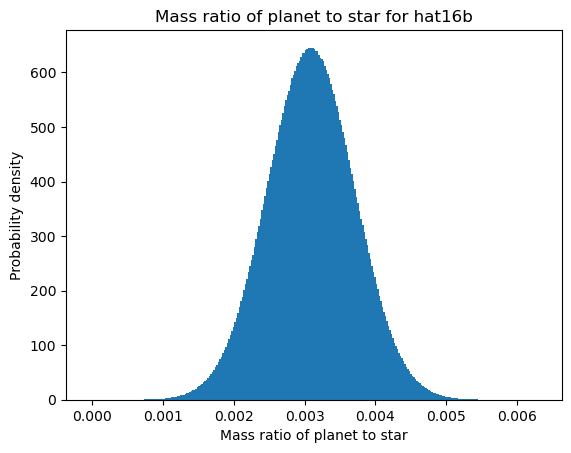

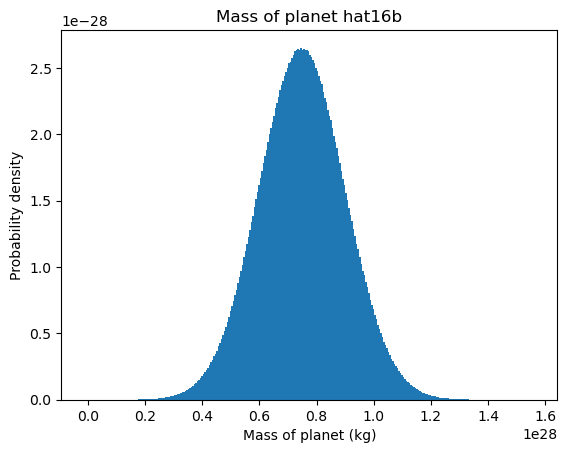

In [37]:
#1.c

#(Vs * p)/(2pi * a) = Mp/Ms

#Vs = radial velocity of the star
#p = period of the planet
#a = semi-major axis of the planet

radial_velocity_dist = np.random.normal(radial_velocity, radial_velocity_err, sz)

ratio_dist = (radial_velocity_dist * period_hat16b * days_to_seconds)/(2 * np.pi * hat16b_semi_major_axis * au_to_m) #Make sure the units are right 

plt.hist(ratio_dist, bins = 300, density = True)

plt.xlabel("Mass ratio of planet to star")
plt.ylabel("Probability density")
plt.title("Mass ratio of planet to star for hat16b")

print("The mean of the ratio is: ", np.mean(ratio_dist))
print("The standard deviation of the ratio is: ", np.std(ratio_dist))


plt.figure()

planet_mass_dist = ratio_dist * has16_mass_dist
plt.hist(planet_mass_dist, bins = 300, density = True)
plt.xlabel("Mass of planet (kg)")
plt.ylabel("Probability density")
plt.title("Mass of planet hat16b")

print("The mean of the mass of the planet is: ", np.mean(planet_mass_dist))
print("The standard deviation of the mass of the planet is: ", np.std(planet_mass_dist))



In [62]:
#1.d

#vp/Vs = ms/Mp

print(np.mean(planet_mass_dist), "planet mass (kg)")
print(np.mean(has16_mass_dist), "star mass (kg)")

vp_over_vs = has16_mass_dist/planet_mass_dist

print(np.mean(vp_over_vs), "ratio of star mass to planet mass")
print(np.std(vp_over_vs), "error on ratio")

#Calculating the star's radius 

star_radius_dist = (vp_over_vs * radial_velocity_dist*transit_time)/2
print(np.mean(star_radius_dist),  "Star radius (m)")
print(np.std(star_radius_dist), "Star radius err (m)")

planet_radius_dist = star_radius_dist*0.1054
print(np.mean(planet_radius_dist), np.std(planet_radius_dist))

7.493805554727976e+27 planet mass (kg)
2.426610306913324e+30 star mass (kg)
338.7210205704025 ratio of star mass to planet mass
84.24487232745794 error on ratio
787388896.4228122 Star radius (m)
8611286.5916361 Star radius err (m)
7.493805554727976e+27 1.5083786692422414e+27
